In [1]:
import pandas as pd

# Load your dataset
# Replace 'homicides_data.csv' with the actual filename or URL of your dataset
data = pd.read_csv('Homicides_Open_Data.csv')

# Convert 'OCC_DATE' to datetime
data['OCC_DATE'] = pd.to_datetime(data['OCC_DATE'])

# Display the first few rows of the dataset for verification
print(data.head())


              X             Y  OBJECTID EVENT_UNIQUE_ID  \
0 -8.837972e+06  5.416827e+06         1   GO-2004111878   
1 -8.820276e+06  5.431728e+06         2   GO-2004125755   
2 -8.817271e+06  5.436217e+06         3   GO-2004136086   
3 -8.842597e+06  5.414587e+06         4   GO-2004148623   
4 -8.816934e+06  5.438174e+06         5   GO-2004148619   

                   OCC_DATE  OCC_YEAR OCC_MONTH  OCC_DAY   OCC_DOW  OCC_DOY  \
0 2004-01-03 05:00:00+00:00      2004   January        3  Saturday        3   
1 2004-01-08 05:00:00+00:00      2004   January        8  Thursday        8   
2 2004-01-08 05:00:00+00:00      2004   January        8  Thursday        8   
3 2004-01-25 05:00:00+00:00      2004   January       25    Sunday       25   
4 2004-01-25 05:00:00+00:00      2004   January       25    Sunday       25   

  DIVISION HOMICIDE_TYPE HOOD_158         NEIGHBOURHOOD_158 HOOD_140  \
0      D53         Other       98       Rosedale-Moore Park       98   
1      D42      Shooting  

In [4]:
# Find the top 5 neighborhoods based on historical homicide counts
top_neighborhoods = data.groupby('NEIGHBOURHOOD_158').size().nlargest(5).index.tolist()

# Filter data for the top neighborhoods
filtered_data = data[data['NEIGHBOURHOOD_158'].isin(top_neighborhoods)]

# Create a time series with counts per month for each neighborhood
time_series_data = filtered_data.groupby(['NEIGHBOURHOOD_158', pd.Grouper(key='OCC_DATE', freq='M')]).size()

# Display the time series data
print(time_series_data)


NEIGHBOURHOOD_158  OCC_DATE                 
Black Creek        2004-05-31 00:00:00+00:00    1
                   2004-07-31 00:00:00+00:00    1
                   2005-01-31 00:00:00+00:00    1
                   2005-06-30 00:00:00+00:00    1
                   2005-09-30 00:00:00+00:00    1
                                               ..
South Riverdale    2018-10-31 00:00:00+00:00    1
                   2021-05-31 00:00:00+00:00    1
                   2021-07-31 00:00:00+00:00    1
                   2022-03-31 00:00:00+00:00    1
                   2023-07-31 00:00:00+00:00    1
Length: 147, dtype: int64


/Users/cj/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


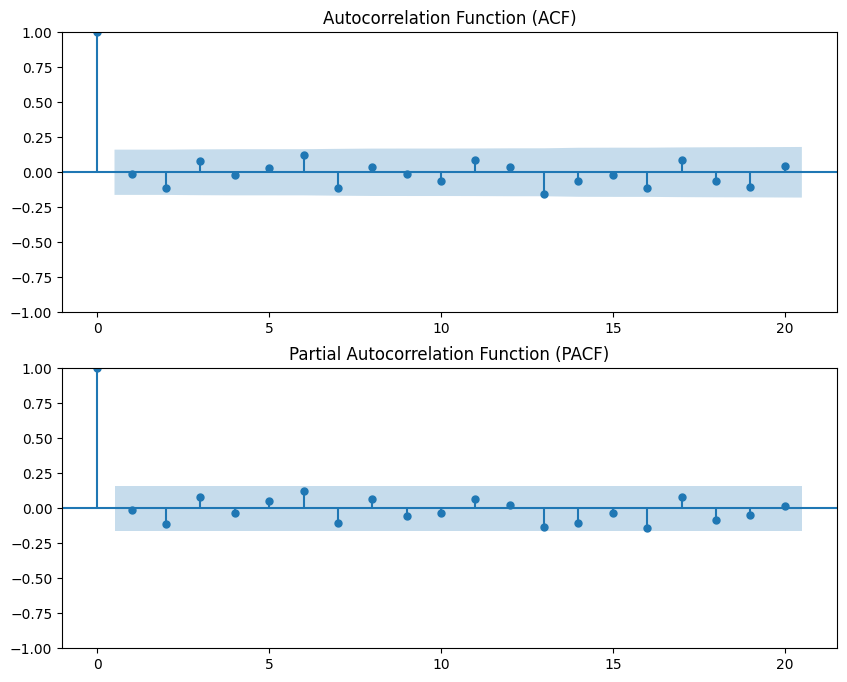

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(time_series_data, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(time_series_data, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA models for each neighborhood with updated values of p and q
forecast_steps = 6
neighborhood_forecasts = {}

for neighborhood, neighborhood_data in time_series_data.groupby('NEIGHBOURHOOD_158'):
    order = (2, 1, 2)  # Replace with appropriate values for p, d, and q
    model = ARIMA(neighborhood_data, order=order)
    results = model.fit()

    # Make predictions for the next 6 months
    forecast = results.get_forecast(steps=forecast_steps)
    neighborhood_forecasts[neighborhood] = forecast.predicted_mean

# Display the forecasted values for each neighborhood
for neighborhood, forecast_values in neighborhood_forecasts.items():
    print(f'Forecast for {neighborhood}:')
    print(forecast_values)


/Users/cj/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cj/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cj/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cj/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cj/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index w

Forecast for Black Creek:
23    1.358511
24    0.725071
25    1.230077
26    1.059616
27    0.922686
28    1.197447
Name: predicted_mean, dtype: float64
Forecast for Glenfield-Jane Heights:
34    1.041621
35    1.174580
36    1.062973
37    1.165188
38    1.072091
39    1.156912
Name: predicted_mean, dtype: float64
Forecast for Moss Park:
35    1.286967
36    1.240694
37    1.265505
38    1.253491
39    1.259301
40    1.256492
Name: predicted_mean, dtype: float64
Forecast for Mount Olive-Silverstone-Jamestown:
32    0.995470
33    1.159527
34    1.374514
35    1.195411
36    1.235154
37    1.267236
Name: predicted_mean, dtype: float64
Forecast for South Riverdale:
23    1.117233
24    1.176608
25    1.194610
26    1.190845
27    1.179857
28    1.169585
Name: predicted_mean, dtype: float64


/Users/cj/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [7]:
import pandas as pd

# Concatenate the forecasted values for all neighborhoods
all_forecasts = pd.concat(neighborhood_forecasts.values(), axis=1)
all_forecasts.columns = neighborhood_forecasts.keys()

# Sum the forecasted values for each neighborhood to get the total forecasted homicides
total_forecasts = all_forecasts.sum()

# Rank the neighborhoods based on the total forecasted homicides
top_neighborhoods = total_forecasts.sort_values(ascending=False).head(5)

# Display the top neighborhoods
print("Top Forecasted Neighborhoods:")
print(top_neighborhoods)


Top Forecasted Neighborhoods:
Moss Park                            7.562451
Mount Olive-Silverstone-Jamestown    7.227314
South Riverdale                      7.028739
Glenfield-Jane Heights               6.673364
Black Creek                          6.493407
dtype: float64


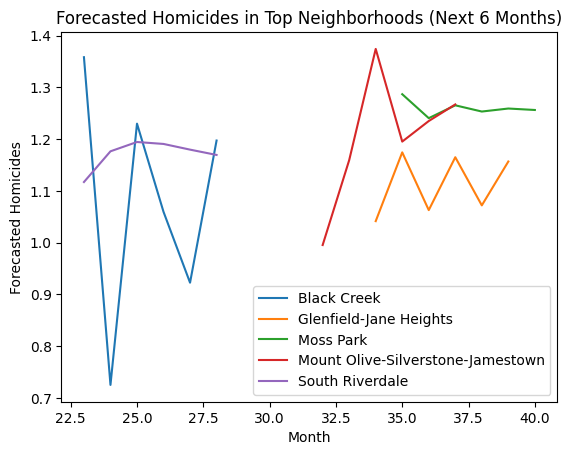

In [15]:
import matplotlib.pyplot as plt

# Plot the forecasted values for each neighborhood
for neighborhood, forecast_values in neighborhood_forecasts.items():
    plt.plot(forecast_values.index, forecast_values, label=neighborhood)

plt.title('Forecasted Homicides in Top Neighborhoods (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Forecasted Homicides')
plt.legend()
plt.show()
